In [2]:
!nvidia-smi

Thu Jun 26 14:32:33 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.03                 Driver Version: 566.03         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   53C    P8             12W /   85W |     305MiB /   6144MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import torch
print(torch.cuda.is_available())  # ควรแสดง True
print(torch.version.cuda)         # ควรแสดง 11.8 หรือใกล้เคียง
print(torch.__version__)          # แสดงเวอร์ชัน torch


False
None
1.12.1


In [ ]:
!pip3 uninstall torch torchvision torchaudio

In [5]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
  Obtaining dependency information for torchaudio from https://download.pytorch.org/whl/cu118/torchaudio-2.7.1%2Bcu118-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for torch from https://download.pytorch.org/whl/cu118/torch-2.7.1%2Bcu118-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 4.1/4.1 MB 2.9 MB/s eta 0:00:00
   ----------------                         1.1/2.8 GB 3.5 MB/s eta 0:07:52


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 437, in _error_catcher
    yield
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 560, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 526, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 94, in read
    self.__buf.write(data)
  File "C:\Users\ASUS\anaconda3\lib\tempfile.py", line 483, in func_wrapper
    return func(*args, **kwargs)
OSError: [Errno 28] No space left on device

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 160, i

In [3]:
import torch
print(torch.cuda.is_available())  # ควรแสดง True
print(torch.cuda.get_device_name(0))  # ควรแสดงชื่อ RTX 3060


True
NVIDIA GeForce RTX 3060 Laptop GPU


In [ ]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu127

In [4]:
!pip3 install ultralytics

  Using cached ultralytics-8.3.159-py3-none-any.whl (1.0 MB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
     ---------------------------------------- 1.7/1.7 MB 3.5 MB/s eta 0:00:00
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl (26 kB)
     -------------------------------------- 216.1/216.1 MB 2.6 MB/s eta 0:00:00
  Using cached sympy-1.14.0-py3-none-any.whl (6.3 MB)
     ---------------------------------------- 43.8/43.8 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully uninstalled typing_extensions-4.4.0
  Attempting uninstall: sympy
    Found existing installation: sympy 1.11.1
    Uninstalling sympy-1.11.1:
      Successfully uninstalled sympy-1.11.1
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1
    Uninstalling torch-1.12.1:

In [15]:
import torch
print(torch.cuda.is_available())


True


In [45]:
import torch
print(torch.cuda.is_available())   # ต้องได้ True
print(torch.version.cuda)          # ควรตรงกับ CUDA driver 12.7 ของคุณ
import torchvision
print(torchvision.__version__)


True
12.6
0.22.1+cpu


In [9]:
!pip3 install --upgrade torch torchvision torchaudio

     ---------------------------------------- 2.5/2.5 MB 1.4 MB/s eta 0:00:00


In [12]:
# Pip install method (recommended)

!pip3 install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics 8.3.159  Python-3.9.6 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Setup complete  (8 CPUs, 15.7 GB RAM, 237.9/246.4 GB disk)


In [13]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
# Python function to automatically create data.yaml config file
# 1. Reads "classes.txt" file to get list of class names
# 2. Creates data dictionary with correct paths to folders, number of classes, and names of classes
# 3. Writes data in YAML format to data.yaml

import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': '/YOLOv8_model/dataset',
      'train': 'train/images',
      'val': 'test/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

# Define path to classes.txt and run function
path_to_classes_txt = '/content/custom_data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

In [10]:
!pip3 install -U ultralytics

You should consider upgrading via the 'c:\users\asus\desktop\pcb_detection\pcb-env\scripts\python.exe -m pip install --upgrade pip' command.


In [5]:
!pip3 install --upgrade ultralytics torch

You should consider upgrading via the 'c:\users\asus\desktop\pcb_detection\pcb-env\scripts\python.exe -m pip install --upgrade pip' command.


In [35]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118

You should consider upgrading via the 'c:\users\asus\desktop\pcb_detection\pcb-env\scripts\python.exe -m pip install --upgrade pip' command.


In [43]:
!pip3 uninstall torchvision
!pip3 install torchvision --index-url https://download.pytorch.org/whl/cu121


^C
Looking in indexes: https://download.pytorch.org/whl/cu121


You should consider upgrading via the 'c:\users\asus\desktop\pcb_detection\pcb-env\scripts\python.exe -m pip install --upgrade pip' command.


In [56]:
import torch

device = torch.device("cpu")
model = YOLO("yolo11n.pt").to(device)

results = model.train(data="dataset/dataset.yaml", epochs=100, imgsz=640)


engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, project=None, rect=False, resume=False, retina_masks=False, save=Tru

train: Scanning C:\Users\ASUS\Desktop\pcb_detection\YOLOv8_model\dataset\train\labels... 14 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:00<00:00, 320.74it/s]

train: New cache created: C:\Users\ASUS\Desktop\pcb_detection\YOLOv8_model\dataset\train\labels.cache
val: Fast image access  (ping: 0.10.0 ms, read: 409.388.5 MB/s, size: 54.6 KB)



val: Scanning C:\Users\ASUS\Desktop\pcb_detection\YOLOv8_model\dataset\test\labels... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 242.02it/s]

val: New cache created: C:\Users\ASUS\Desktop\pcb_detection\YOLOv8_model\dataset\test\labels.cache
Plotting labels to c:\Users\ASUS\Desktop\pcb_detection\runs\detect\train4\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to c:\Users\ASUS\Desktop\pcb_detection\runs\detect\train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
from ultralytics import YOLO

device = torch.device("cpu")
model = YOLO("yolov8n.pt").to(device)  # โหลด pretrained nano model

results = model.train(
    data="dataset/dataset.yaml",  # กำหนด path dataset.yaml ของคุณ
    epochs=80,                    # เทรน 80 รอบ
    batch=4,                     # batch size 4
    imgsz=640,                   # ขนาดภาพ
    patience=20                 # หยุดเทรนถ้าไม่ดีขึ้น 10 epochs                   # ใช้ GPU หมายเลข 0 (ถ้ามี)
)


engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=80, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, project=None, rect=False, resume=False, retina_masks=False, save=True, 

train: Scanning C:\Users\ASUS\Desktop\pcb_detection\YOLOv8_model\dataset\train\labels.cache... 14 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:00<?, ?it/s]

val: Fast image access  (ping: 0.10.0 ms, read: 270.668.6 MB/s, size: 54.6 KB)



val: Scanning C:\Users\ASUS\Desktop\pcb_detection\YOLOv8_model\dataset\test\labels.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

Plotting labels to c:\Users\ASUS\Desktop\pcb_detection\runs\detect\train5\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to c:\Users\ASUS\Desktop\pcb_detection\runs\detect\train5
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/80         0G      3.842      6.338      2.388          9        640: 100%|██████████| 4/4 [00:08<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/80         0G      3.279        5.1      2.351         24        640: 100%|██████████| 4/4 [00:07<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/80         0G      3.434       5.68      2.293          4        640: 100%|██████████| 4/4 [00:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/80         0G      3.002      5.249      2.119          6        640: 100%|██████████| 4/4 [00:08<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/80         0G      3.013      4.609      1.939         14        640: 100%|██████████| 4/4 [00:06<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/80         0G      3.112      5.313      1.876         18        640: 100%|██████████| 4/4 [00:07<00:00,  1.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/80         0G      2.883      4.776      1.879          8        640: 100%|██████████| 4/4 [00:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/80         0G      3.311      4.729      1.888         14        640: 100%|██████████| 4/4 [00:07<00:00,  1.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/80         0G      2.887      4.843      1.812          8        640: 100%|██████████| 4/4 [00:07<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/80         0G      3.084      4.506      1.721          6        640: 100%|██████████| 4/4 [00:06<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/80         0G      2.682      4.238      1.716          9        640: 100%|██████████| 4/4 [00:08<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/80         0G      2.715      4.385      1.733         20        640: 100%|██████████| 4/4 [00:07<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80         0G      2.716          4      1.668         23        640: 100%|██████████| 4/4 [00:08<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/80         0G      2.663      4.389      1.623         14        640: 100%|██████████| 4/4 [00:08<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/80         0G      3.069      4.033      1.566         23        640: 100%|██████████| 4/4 [00:08<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80         0G      2.611        4.4      1.518         16        640: 100%|██████████| 4/4 [00:07<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/80         0G      2.542      3.958      1.533         16        640: 100%|██████████| 4/4 [00:07<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/80         0G      2.668      4.396      1.673          5        640: 100%|██████████| 4/4 [00:10<00:00,  2.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all          4         33    0.00454        0.1    0.00773    0.00168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/80         0G      2.394      4.096      1.458         17        640: 100%|██████████| 4/4 [00:12<00:00,  3.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all          4         33    0.00454        0.1    0.00773    0.00168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/80         0G      2.638      3.748      1.509         18        640: 100%|██████████| 4/4 [00:07<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]

                   all          4         33    0.00454        0.1    0.00773    0.00168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/80         0G      2.434      3.744      1.471          7        640: 100%|██████████| 4/4 [00:08<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all          4         33    0.00454        0.1    0.00773    0.00168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/80         0G      2.574      3.651      1.524         14        640: 100%|██████████| 4/4 [00:16<00:00,  4.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.81s/it]

                   all          4         33    0.00395      0.117    0.00604    0.00156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/80         0G      2.523      3.881      1.437         17        640: 100%|██████████| 4/4 [00:15<00:00,  3.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.36s/it]

                   all          4         33    0.00395      0.117    0.00604    0.00156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/80         0G      2.378      3.623      1.498         20        640: 100%|██████████| 4/4 [00:11<00:00,  2.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all          4         33    0.00395      0.117    0.00604    0.00156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/80         0G      2.593      3.461      1.501         32        640: 100%|██████████| 4/4 [00:10<00:00,  2.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all          4         33    0.00395      0.117    0.00604    0.00156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/80         0G      2.889      6.102      2.005          1        640: 100%|██████████| 4/4 [00:09<00:00,  2.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all          4         33    0.00461      0.133    0.00696    0.00153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/80         0G      2.463      3.638      1.558          9        640: 100%|██████████| 4/4 [00:07<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all          4         33    0.00461      0.133    0.00696    0.00153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/80         0G      2.356       3.25      1.483          7        640: 100%|██████████| 4/4 [00:09<00:00,  2.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

                   all          4         33    0.00461      0.133    0.00696    0.00153
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 18, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



28 epochs completed in 0.079 hours.
Optimizer stripped from c:\Users\ASUS\Desktop\pcb_detection\runs\detect\train5\weights\last.pt, 6.2MB
Optimizer stripped from c:\Users\ASUS\Desktop\pcb_detection\runs\detect\train5\weights\best.pt, 6.2MB

Validating c:\Users\ASUS\Desktop\pcb_detection\runs\detect\train5\weights\best.pt...
Ultralytics 8.3.159  Python-3.9.6 torch-2.7.1+cu126 CPU (11th Gen Intel Core(TM) i5-11300H 3.10GHz)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.72s/it]


                   all          4         33    0.00454        0.1    0.00773     0.0015
          Open Circuit          4         20     0.0136        0.3     0.0232    0.00449
          Missing Hole          3          4          0          0          0          0
            Mouse Bite          4          9          0          0          0          0
Speed: 13.8ms preprocess, 344.0ms inference, 0.0ms loss, 29.5ms postprocess per image
Results saved to c:\Users\ASUS\Desktop\pcb_detection\runs\detect\train5


In [71]:
from ultralytics import YOLO

device = torch.device("cpu")
model = YOLO("yolo11n.pt").to(device)  # โหลด pretrained nano model

results = model.train(
    data="dataset/dataset.yaml",  # กำหนด path dataset.yaml ของคุณ
    epochs=80,                    # เทรน 80 รอบ
    batch=4,                     # batch size 4
    imgsz=320,                   # ขนาดภาพ
    patience=20,
)


engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=80, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, project=None, rect=False, resume=False, retina_masks=False, save=True, 

train: Scanning C:\Users\ASUS\Desktop\pcb_detection\YOLOv8_model\dataset\train\labels.cache... 14 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:00<?, ?it/s]

val: Fast image access  (ping: 0.20.0 ms, read: 89.736.5 MB/s, size: 54.6 KB)



val: Scanning C:\Users\ASUS\Desktop\pcb_detection\YOLOv8_model\dataset\test\labels.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

Plotting labels to c:\Users\ASUS\Desktop\pcb_detection\runs\detect\train5\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to c:\Users\ASUS\Desktop\pcb_detection\runs\detect\train5
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/80         0G      4.671      7.281      2.429          9        320: 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/80         0G      4.877      5.278      2.796         24        320: 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/80         0G      4.478      5.727      2.278          4        320: 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/80         0G      4.417      5.253      2.232          5        320: 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/80         0G      3.915      4.674       2.11         14        320: 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/80         0G       4.24       5.84      1.925         18        320: 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/80         0G      4.251      4.938      2.041          8        320: 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/80         0G      4.251      4.887       1.84         13        320: 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/80         0G      3.938      4.824      1.909          8        320: 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/80         0G      4.004       5.01      1.804          6        320: 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/80         0G      3.356      4.643      1.605          9        320: 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/80         0G      3.618      4.671      1.695         20        320: 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80         0G      3.411      4.465      1.586         23        320: 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/80         0G      3.256      4.625      1.561         14        320: 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/80         0G      4.005      4.642      1.567         23        320: 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80         0G       3.64      4.768      1.591         16        320: 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/80         0G      3.314      4.521      1.491         16        320: 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/80         0G       3.91      4.792      1.761          5        320: 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all          4         33   0.000557     0.0167   0.000297   5.94e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/80         0G      3.328       4.54      1.556         17        320: 100%|██████████| 4/4 [00:01<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all          4         33   0.000557     0.0167   0.000297   5.94e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/80         0G      3.777      4.325      1.625         18        320: 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all          4         33   0.000557     0.0167   0.000297   5.94e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/80         0G      3.246      4.332      1.485          7        320: 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all          4         33   0.000557     0.0167   0.000297   5.94e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/80         0G       3.55      4.346      1.487         14        320: 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]

                   all          4         33    0.00113     0.0333   0.000767   0.000143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/80         0G      3.497      4.377      1.394         17        320: 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all          4         33    0.00113     0.0333   0.000767   0.000143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/80         0G      3.274      4.265      1.569         20        320: 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all          4         33    0.00113     0.0333   0.000767   0.000143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/80         0G      3.106      4.111      1.464         32        320: 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all          4         33    0.00113     0.0333   0.000767   0.000143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/80         0G      3.037      4.925       1.58          1        320: 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/80         0G      2.976      4.152      1.321          9        320: 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/80         0G      3.128       3.96      1.427          7        320: 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/80         0G      2.997      4.061      1.444          9        320: 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/80         0G      3.205      3.959      1.365         12        320: 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/80         0G      3.487      4.766      1.307          1        320: 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/80         0G      3.005      3.732      1.336          9        320: 100%|██████████| 4/4 [00:01<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/80         0G      2.948      3.678      1.381         19        320: 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all          4         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/80         0G      3.144      3.824      1.369         11        320: 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all          4         33    0.00152       0.05    0.00131   0.000131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/80         0G      3.262      4.352      1.385          4        320: 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

                   all          4         33    0.00152       0.05    0.00131   0.000131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/80         0G      3.231      4.007      1.401          4        320: 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all          4         33    0.00152       0.05    0.00131   0.000131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/80         0G      3.205      3.832      1.514         24        320: 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all          4         33    0.00152       0.05    0.00131   0.000131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/80         0G      2.824      3.713      1.292         17        320: 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all          4         33    0.00182     0.0667    0.00125   0.000296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/80         0G      2.982      3.508      1.363         17        320: 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all          4         33    0.00182     0.0667    0.00125   0.000296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/80         0G      3.444      4.122      1.443         14        320: 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all          4         33    0.00182     0.0667    0.00125   0.000296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/80         0G      3.163      3.812      1.314         12        320: 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all          4         33    0.00182     0.0667    0.00125   0.000296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/80         0G       2.98      3.443      1.319         20        320: 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all          4         33    0.00185     0.0667     0.0012    0.00042



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/80         0G      3.136      3.976      1.343          5        320: 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all          4         33    0.00185     0.0667     0.0012    0.00042



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/80         0G      3.252      4.127      1.492          3        320: 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all          4         33    0.00185     0.0667     0.0012    0.00042



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/80         0G      2.828      3.368      1.356         19        320: 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all          4         33    0.00185     0.0667     0.0012    0.00042



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/80         0G      3.109      3.673       1.44         24        320: 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all          4         33    0.00218     0.0833    0.00198   0.000476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/80         0G      2.979      3.619      1.456          9        320: 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all          4         33    0.00218     0.0833    0.00198   0.000476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/80         0G      3.157      3.919      1.333          8        320: 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all          4         33    0.00218     0.0833    0.00198   0.000476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/80         0G      2.813      3.266      1.272         13        320: 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all          4         33    0.00218     0.0833    0.00198   0.000476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/80         0G      2.964      3.394      1.344         24        320: 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all          4         33       0.68     0.0333     0.0038   0.000666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/80         0G      2.815      3.305      1.326         14        320: 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all          4         33       0.68     0.0333     0.0038   0.000666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/80         0G       3.62      3.841      1.354         25        320: 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all          4         33       0.68     0.0333     0.0038   0.000666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/80         0G      3.009      3.324      1.273         17        320: 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all          4         33       0.68     0.0333     0.0038   0.000666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/80         0G      3.189      3.542      1.325          4        320: 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all          4         33    0.00246     0.0833    0.00431   0.000792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/80         0G      2.889      3.338      1.379          9        320: 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all          4         33    0.00246     0.0833    0.00431   0.000792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/80         0G      3.008      3.557      1.344         19        320: 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all          4         33    0.00246     0.0833    0.00431   0.000792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/80         0G      3.138      3.645      1.401         21        320: 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]

                   all          4         33    0.00246     0.0833    0.00431   0.000792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/80         0G      3.102      3.551      1.269         15        320: 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all          4         33     0.0027     0.0833    0.00343   0.000594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/80         0G      3.123      3.357      1.503          4        320: 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all          4         33     0.0027     0.0833    0.00343   0.000594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/80         0G      2.957      3.148      1.275         12        320: 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all          4         33     0.0027     0.0833    0.00343   0.000594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/80         0G       2.88      3.513      1.235          4        320: 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all          4         33     0.0027     0.0833    0.00343   0.000594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/80         0G      2.788      3.267      1.264         26        320: 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all          4         33    0.00265     0.0833    0.00208   0.000609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/80         0G      2.644      3.123      1.267          7        320: 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all          4         33    0.00265     0.0833    0.00208   0.000609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/80         0G      2.916      3.455      1.279          3        320: 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all          4         33    0.00265     0.0833    0.00208   0.000609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/80         0G      3.207      3.867       1.36          9        320: 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all          4         33    0.00265     0.0833    0.00208   0.000609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/80         0G      3.064      3.397      1.437         20        320: 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all          4         33      0.687     0.0167    0.00758    0.00113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/80         0G      3.614      4.479      1.253         18        320: 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all          4         33      0.687     0.0167    0.00758    0.00113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/80         0G      2.622      4.027      1.255          2        320: 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all          4         33      0.687     0.0167    0.00758    0.00113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/80         0G      2.974      3.234      1.253         28        320: 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all          4         33      0.687     0.0167    0.00758    0.00113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/80         0G      2.821      3.526      1.191          7        320: 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all          4         33      0.713     0.0167    0.00714    0.00132


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/80         0G      2.914      3.519      1.359         18        320: 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all          4         33      0.713     0.0167    0.00714    0.00132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/80         0G      2.656       3.72      1.255          4        320: 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all          4         33      0.713     0.0167    0.00714    0.00132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/80         0G       2.67      3.133      1.275          5        320: 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all          4         33      0.713     0.0167    0.00714    0.00132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/80         0G      2.812      3.767      1.362          3        320: 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all          4         33      0.702     0.0167    0.00582    0.00134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/80         0G      3.279      4.919      1.298          1        320: 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all          4         33      0.702     0.0167    0.00582    0.00134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/80         0G      2.543      3.351      1.253         10        320: 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all          4         33      0.702     0.0167    0.00582    0.00134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/80         0G      2.598      3.366      1.286         13        320: 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all          4         33      0.702     0.0167    0.00582    0.00134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/80         0G      2.806      3.341      1.335         11        320: 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all          4         33      0.712     0.0167    0.00611    0.00143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/80         0G      2.887      3.391      1.196          7        320: 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all          4         33      0.712     0.0167    0.00611    0.00143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/80         0G      2.681      3.623      1.213          3        320: 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all          4         33      0.712     0.0167    0.00611    0.00143



80 epochs completed in 0.067 hours.
Optimizer stripped from c:\Users\ASUS\Desktop\pcb_detection\runs\detect\train5\weights\last.pt, 5.4MB
Optimizer stripped from c:\Users\ASUS\Desktop\pcb_detection\runs\detect\train5\weights\best.pt, 5.4MB

Validating c:\Users\ASUS\Desktop\pcb_detection\runs\detect\train5\weights\best.pt...
Ultralytics 8.3.159  Python-3.9.6 torch-2.7.1+cu126 CPU (11th Gen Intel Core(TM) i5-11300H 3.10GHz)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]


                   all          4         33      0.712     0.0167     0.0061    0.00143
          Open Circuit          4         20      0.137       0.05     0.0183    0.00429
          Missing Hole          3          4          1          0          0          0
            Mouse Bite          4          9          1          0          0          0
Speed: 0.7ms preprocess, 67.6ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to c:\Users\ASUS\Desktop\pcb_detection\runs\detect\train5


In [ ]:
from ultralytics import YOLO

# device = torch.device("cpu")
# model = YOLO("yolo11m.pt").to(device)  # โหลด pretrained nano model

model = YOLO("yolo11m.pt")

results = model.train(
    data="dataset/dataset.yaml",  # กำหนด path dataset.yaml ของคุณ
    epochs=200,                    # เทรน 80 รอบ
    batch=4,                     # batch size 4
    imgsz=320,                   # ขนาดภาพ
)


Ultralytics 8.3.159  Python-3.9.6 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train7, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=1

In [ ]:
import os
import cv2
from glob import glob
from ultralytics import YOLO
import albumentations as A

# Path config
train_img_dir = "dataset/train/images"
train_lbl_dir = "dataset/train/labels"
aug_img_dir = "dataset/train/images"
aug_lbl_dir = "dataset/train/labels"

# สร้าง augmentation
transform = A.Compose([
    A.Rotate(limit=30, p=1),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2)
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

# ทำการ augment ภาพทั้งหมด
image_paths = glob(os.path.join(train_img_dir, "*.jpg"))
for img_path in image_paths:
    filename = os.path.basename(img_path)
    label_path = os.path.join(train_lbl_dir, filename.replace(".jpg", ".txt"))
    
    # Load image
    image = cv2.imread(img_path)
    h, w = image.shape[:2]

    # Load bbox
    bboxes, class_labels = [], []
    with open(label_path) as f:
        for line in f:
            cls, x, y, bw, bh = map(float, line.split())
            x *= w
            y *= h
            bw *= w
            bh *= h
            xmin = x - bw / 2
            ymin = y - bh / 2
            xmax = x + bw / 2
            ymax = y + bh / 2
            bboxes.append([xmin, ymin, xmax, ymax])
            class_labels.append(int(cls))

    # สร้าง 3 รูปจากรูปเดียว
    for i in range(3):
        augmented = transform(image=image, bboxes=bboxes, class_labels=class_labels)
        aug_img = augmented['image']
        aug_bboxes = augmented['bboxes']

        new_filename = filename.replace(".jpg", f"_aug{i}.jpg")
        cv2.imwrite(os.path.join(aug_img_dir, new_filename), aug_img)

        new_label_path = os.path.join(aug_lbl_dir, new_filename.replace(".jpg", ".txt"))
        with open(new_label_path, "w") as f:
            for bbox, cls in zip(aug_bboxes, class_labels):
                xmin, ymin, xmax, ymax = bbox
                x_center = ((xmin + xmax) / 2) / w
                y_center = ((ymin + ymax) / 2) / h
                box_w = (xmax - xmin) / w
                box_h = (ymax - ymin) / h
                f.write(f"{cls} {x_center:.6f} {y_center:.6f} {box_w:.6f} {box_h:.6f}\n")

print("✅ Done augmenting!")

device = torch.device("cpu")
model = YOLO("yolo11m.pt").to(device)  # โหลด pretrained nano model

results = model.train(
    data="dataset/dataset.yaml",  # กำหนด path dataset.yaml ของคุณ
    epochs=80,                    # เทรน 80 รอบ
    batch=4,                     # batch size 4
    imgsz=320,                   # ขนาดภาพ
    patience=20,
    scaleFill=True                 # หยุดเทรนถ้าไม่ดีขึ้น 10 epochs                   # ใช้ GPU หมายเลข 0 (ถ้ามี)
)


ModuleNotFoundError: No module named 'albumentations'

In [68]:
!pip3 install albumentations

  Using cached albumentations-2.0.8-py3-none-any.whl (369 kB)
  Using cached albucore-0.0.24-py3-none-any.whl (15 kB)
  Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl (39.4 MB)
  Using cached eval_type_backport-0.2.2-py3-none-any.whl (5.8 kB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\asus\\desktop\\pcb_detection\\pcb-env\\Lib\\site-packages\\cv2\\cv2.pyd'
Check the permissions.

You should consider upgrading via the 'c:\users\asus\desktop\pcb_detection\pcb-env\scripts\python.exe -m pip install --upgrade pip' command.



image 1/4 c:\Users\ASUS\Desktop\pcb_detection\YOLOv8_model\dataset\test\images\1_pcb_output1.jpg: 224x320 (no detections), 91.0ms
image 2/4 c:\Users\ASUS\Desktop\pcb_detection\YOLOv8_model\dataset\test\images\1_pcb_output2.jpg: 224x320 6 Open Circuits, 224.3ms
image 3/4 c:\Users\ASUS\Desktop\pcb_detection\YOLOv8_model\dataset\test\images\2_pcb_output1.jpg: 288x320 1 Open Circuit, 100.9ms
image 4/4 c:\Users\ASUS\Desktop\pcb_detection\YOLOv8_model\dataset\test\images\3_pcb_output1.jpg: 288x320 5 Open Circuits, 58.6ms
Speed: 1.4ms preprocess, 118.7ms inference, 0.8ms postprocess per image at shape (1, 3, 288, 320)


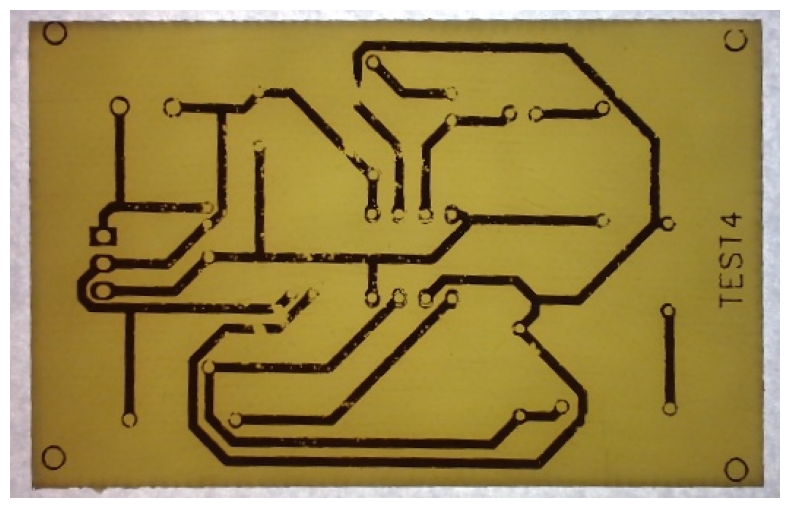

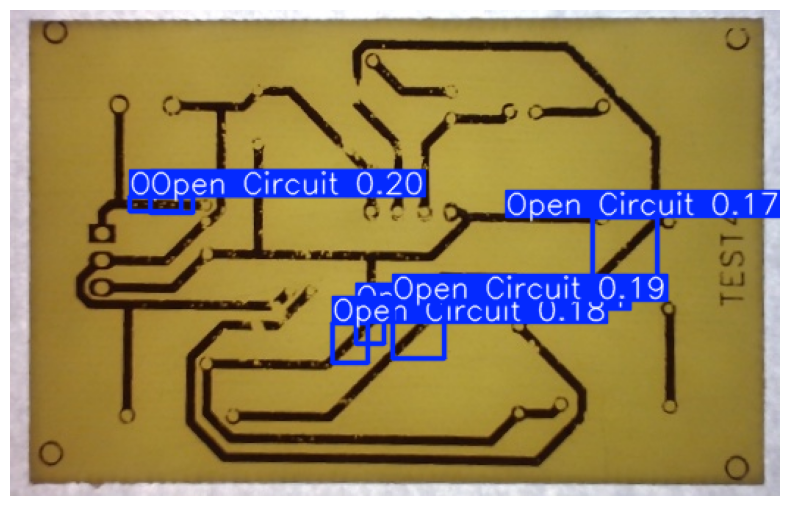

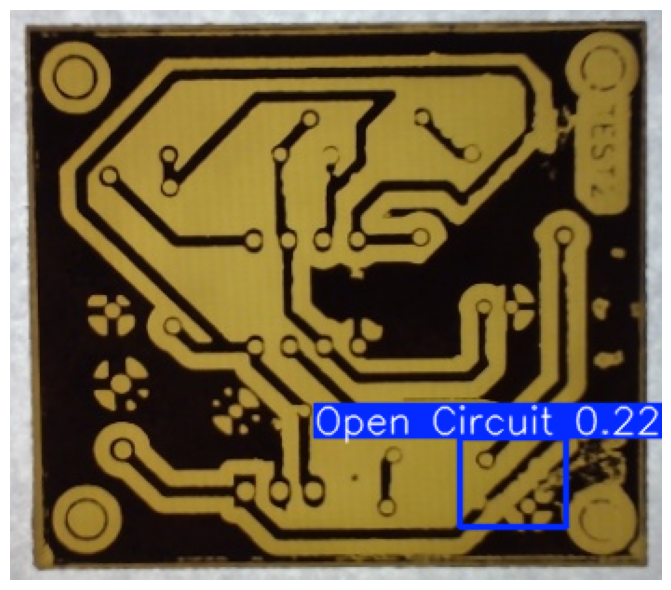

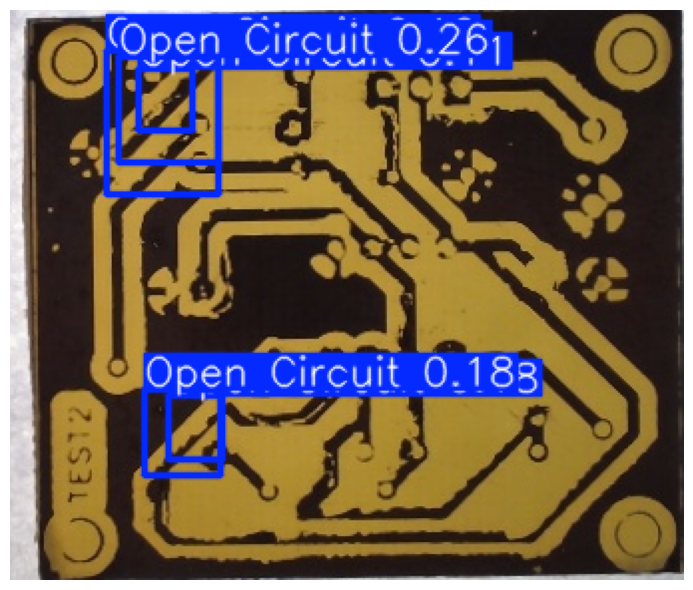

In [75]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

%matplotlib inline
# โหลดโมเดลที่เทรนแล้ว
model = YOLO("runs/detect/train3/weights/best.pt")

# ทำ prediction กับภาพใน dataset/test/images
results = model.predict(
    source="dataset/test/images",  # โฟลเดอร์ภาพทดสอบ
    device='cpu',
    save=False,                    # ไม่บันทึกไฟล์อัตโนมัติ
    imgsz=320,                     # ขนาดภาพ
    conf=0.1,                     # ค่าความมั่นใจขั้นต่ำ
    show=False                     # ปิดโชว์แบบ GUI (ใช้ matplotlib แทน)
)

# แสดงภาพพร้อมผลลัพธ์
for result in results:
    # ดึงภาพที่มีการวาดกล่องมาแล้ว
    img_with_boxes = result.plot()  # numpy array (BGR)
    
    # แปลง BGR เป็น RGB เพื่อใช้กับ matplotlib
    img_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)
    
    # แสดงภาพ
    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.tight_layout()
    plt.show()


In [60]:
!yolo detect predict model=runs/detect/train2/weights/last.pt source=dataset/test/images save=True

Ultralytics 8.3.159  Python-3.9.6 torch-2.7.1+cu126 CPU (11th Gen Intel Core(TM) i5-11300H 3.10GHz)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

image 1/4 c:\Users\ASUS\Desktop\pcb_detection\YOLOv8_model\dataset\test\images\1_pcb_output1.jpg: 416x640 (no detections), 101.4ms
image 2/4 c:\Users\ASUS\Desktop\pcb_detection\YOLOv8_model\dataset\test\images\1_pcb_output2.jpg: 416x640 (no detections), 73.4ms
image 3/4 c:\Users\ASUS\Desktop\pcb_detection\YOLOv8_model\dataset\test\images\2_pcb_output1.jpg: 576x640 (no detections), 124.7ms
image 4/4 c:\Users\ASUS\Desktop\pcb_detection\YOLOv8_model\dataset\test\images\3_pcb_output1.jpg: 544x640 (no detections), 113.6ms
Speed: 3.6ms preprocess, 103.3ms inference, 0.7ms postprocess per image at shape (1, 3, 544, 640)
Results saved to c:\users\asus\desktop\pcb_detection\runs\detect\predict7
 Learn more at https://docs.ultralytics.com/modes/predict


In [26]:
!pip3 install --upgrade ultralytics


  Using cached ultralytics-8.3.159-py3-none-any.whl (1.0 MB)
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.2.103
    Uninstalling ultralytics-8.2.103:
      Successfully uninstalled ultralytics-8.2.103


You should consider upgrading via the 'c:\users\asus\desktop\pcb_detection\pcb-env\scripts\python.exe -m pip install --upgrade pip' command.


In [27]:
from ultralytics import YOLO

# ใช้โมเดล yolo แบบถูกต้อง เช่น yolo v8 nano
model = YOLO("yolo11n.pt")

# เทรนด้วย dataset.yaml ของคุณ
results = model.train(data="dataset/dataset.yaml", epochs=100, imgsz=640)


Ultralytics 8.3.159  Python-3.9.6 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=

NotImplementedError: Could not run 'torchvision::nms' with arguments from the 'CUDA' backend. This could be because the operator doesn't exist for this backend, or was omitted during the selective/custom build process (if using custom build). If you are a Facebook employee using PyTorch on mobile, please visit https://fburl.com/ptmfixes for possible resolutions. 'torchvision::nms' is only available for these backends: [CPU, Meta, QuantizedCPU, BackendSelect, Python, FuncTorchDynamicLayerBackMode, Functionalize, Named, Conjugate, Negative, ZeroTensor, ADInplaceOrView, AutogradOther, AutogradCPU, AutogradCUDA, AutogradXLA, AutogradMPS, AutogradXPU, AutogradHPU, AutogradLazy, AutogradMTIA, AutogradMeta, Tracer, AutocastCPU, AutocastMTIA, AutocastXPU, AutocastMPS, AutocastCUDA, FuncTorchBatched, BatchedNestedTensor, FuncTorchVmapMode, Batched, VmapMode, FuncTorchGradWrapper, PythonTLSSnapshot, FuncTorchDynamicLayerFrontMode, PreDispatch, PythonDispatcher].

CPU: registered at C:\actions-runner\_work\vision\vision\pytorch\vision\torchvision\csrc\ops\cpu\nms_kernel.cpp:112 [kernel]
Meta: registered at /dev/null:214 [kernel]
QuantizedCPU: registered at C:\actions-runner\_work\vision\vision\pytorch\vision\torchvision\csrc\ops\quantized\cpu\qnms_kernel.cpp:124 [kernel]
BackendSelect: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\BackendSelectFallbackKernel.cpp:3 [backend fallback]
Python: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\PythonFallbackKernel.cpp:194 [backend fallback]
FuncTorchDynamicLayerBackMode: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\functorch\DynamicLayer.cpp:479 [backend fallback]
Functionalize: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\FunctionalizeFallbackKernel.cpp:349 [backend fallback]
Named: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\NamedRegistrations.cpp:7 [backend fallback]
Conjugate: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\ConjugateFallback.cpp:17 [backend fallback]
Negative: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\NegateFallback.cpp:18 [backend fallback]
ZeroTensor: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\ZeroTensorFallback.cpp:86 [backend fallback]
ADInplaceOrView: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:100 [backend fallback]
AutogradOther: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:63 [backend fallback]
AutogradCPU: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:67 [backend fallback]
AutogradCUDA: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:75 [backend fallback]
AutogradXLA: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:83 [backend fallback]
AutogradMPS: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:91 [backend fallback]
AutogradXPU: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:71 [backend fallback]
AutogradHPU: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:104 [backend fallback]
AutogradLazy: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:87 [backend fallback]
AutogradMTIA: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:79 [backend fallback]
AutogradMeta: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:95 [backend fallback]
Tracer: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\TraceTypeManual.cpp:294 [backend fallback]
AutocastCPU: registered at C:\actions-runner\_work\vision\vision\pytorch\vision\torchvision\csrc\ops\autocast\nms_kernel.cpp:34 [kernel]
AutocastMTIA: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\autocast_mode.cpp:466 [backend fallback]
AutocastXPU: registered at C:\actions-runner\_work\vision\vision\pytorch\vision\torchvision\csrc\ops\autocast\nms_kernel.cpp:41 [kernel]
AutocastMPS: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\autocast_mode.cpp:209 [backend fallback]
AutocastCUDA: registered at C:\actions-runner\_work\vision\vision\pytorch\vision\torchvision\csrc\ops\autocast\nms_kernel.cpp:27 [kernel]
FuncTorchBatched: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\functorch\LegacyBatchingRegistrations.cpp:731 [backend fallback]
BatchedNestedTensor: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\functorch\LegacyBatchingRegistrations.cpp:758 [backend fallback]
FuncTorchVmapMode: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\functorch\VmapModeRegistrations.cpp:27 [backend fallback]
Batched: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\LegacyBatchingRegistrations.cpp:1075 [backend fallback]
VmapMode: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\VmapModeRegistrations.cpp:33 [backend fallback]
FuncTorchGradWrapper: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\functorch\TensorWrapper.cpp:208 [backend fallback]
PythonTLSSnapshot: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\PythonFallbackKernel.cpp:202 [backend fallback]
FuncTorchDynamicLayerFrontMode: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\functorch\DynamicLayer.cpp:475 [backend fallback]
PreDispatch: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\PythonFallbackKernel.cpp:206 [backend fallback]
PythonDispatcher: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\PythonFallbackKernel.cpp:198 [backend fallback]


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

results = model.train(
    data="dataset/dataset.yaml",   # เส้นทางไปยัง dataset.yaml
    epochs=100,
    imgsz=640
)



Ultralytics 8.3.159  Python-3.9.6 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train18, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose

NotImplementedError: Could not run 'torchvision::nms' with arguments from the 'CUDA' backend. This could be because the operator doesn't exist for this backend, or was omitted during the selective/custom build process (if using custom build). If you are a Facebook employee using PyTorch on mobile, please visit https://fburl.com/ptmfixes for possible resolutions. 'torchvision::nms' is only available for these backends: [CPU, Meta, QuantizedCPU, BackendSelect, Python, FuncTorchDynamicLayerBackMode, Functionalize, Named, Conjugate, Negative, ZeroTensor, ADInplaceOrView, AutogradOther, AutogradCPU, AutogradCUDA, AutogradXLA, AutogradMPS, AutogradXPU, AutogradHPU, AutogradLazy, AutogradMTIA, AutogradMeta, Tracer, AutocastCPU, AutocastMTIA, AutocastXPU, AutocastMPS, AutocastCUDA, FuncTorchBatched, BatchedNestedTensor, FuncTorchVmapMode, Batched, VmapMode, FuncTorchGradWrapper, PythonTLSSnapshot, FuncTorchDynamicLayerFrontMode, PreDispatch, PythonDispatcher].

CPU: registered at C:\actions-runner\_work\vision\vision\pytorch\vision\torchvision\csrc\ops\cpu\nms_kernel.cpp:112 [kernel]
Meta: registered at /dev/null:214 [kernel]
QuantizedCPU: registered at C:\actions-runner\_work\vision\vision\pytorch\vision\torchvision\csrc\ops\quantized\cpu\qnms_kernel.cpp:124 [kernel]
BackendSelect: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\BackendSelectFallbackKernel.cpp:3 [backend fallback]
Python: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\PythonFallbackKernel.cpp:194 [backend fallback]
FuncTorchDynamicLayerBackMode: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\functorch\DynamicLayer.cpp:479 [backend fallback]
Functionalize: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\FunctionalizeFallbackKernel.cpp:349 [backend fallback]
Named: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\NamedRegistrations.cpp:7 [backend fallback]
Conjugate: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\ConjugateFallback.cpp:17 [backend fallback]
Negative: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\NegateFallback.cpp:18 [backend fallback]
ZeroTensor: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\ZeroTensorFallback.cpp:86 [backend fallback]
ADInplaceOrView: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:100 [backend fallback]
AutogradOther: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:63 [backend fallback]
AutogradCPU: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:67 [backend fallback]
AutogradCUDA: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:75 [backend fallback]
AutogradXLA: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:83 [backend fallback]
AutogradMPS: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:91 [backend fallback]
AutogradXPU: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:71 [backend fallback]
AutogradHPU: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:104 [backend fallback]
AutogradLazy: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:87 [backend fallback]
AutogradMTIA: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:79 [backend fallback]
AutogradMeta: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:95 [backend fallback]
Tracer: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\TraceTypeManual.cpp:294 [backend fallback]
AutocastCPU: registered at C:\actions-runner\_work\vision\vision\pytorch\vision\torchvision\csrc\ops\autocast\nms_kernel.cpp:34 [kernel]
AutocastMTIA: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\autocast_mode.cpp:466 [backend fallback]
AutocastXPU: registered at C:\actions-runner\_work\vision\vision\pytorch\vision\torchvision\csrc\ops\autocast\nms_kernel.cpp:41 [kernel]
AutocastMPS: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\autocast_mode.cpp:209 [backend fallback]
AutocastCUDA: registered at C:\actions-runner\_work\vision\vision\pytorch\vision\torchvision\csrc\ops\autocast\nms_kernel.cpp:27 [kernel]
FuncTorchBatched: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\functorch\LegacyBatchingRegistrations.cpp:731 [backend fallback]
BatchedNestedTensor: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\functorch\LegacyBatchingRegistrations.cpp:758 [backend fallback]
FuncTorchVmapMode: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\functorch\VmapModeRegistrations.cpp:27 [backend fallback]
Batched: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\LegacyBatchingRegistrations.cpp:1075 [backend fallback]
VmapMode: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\VmapModeRegistrations.cpp:33 [backend fallback]
FuncTorchGradWrapper: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\functorch\TensorWrapper.cpp:208 [backend fallback]
PythonTLSSnapshot: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\PythonFallbackKernel.cpp:202 [backend fallback]
FuncTorchDynamicLayerFrontMode: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\functorch\DynamicLayer.cpp:475 [backend fallback]
PreDispatch: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\PythonFallbackKernel.cpp:206 [backend fallback]
PythonDispatcher: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\PythonFallbackKernel.cpp:198 [backend fallback]


In [16]:
!yolo TASK MODE ARGS

Traceback (most recent call last):
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\ASUS\Desktop\pcb_detection\pcb-env\Scripts\yolo.exe\__main__.py", line 7, in <module>
    sys.exit(entrypoint())
  File "c:\users\asus\desktop\pcb_detection\pcb-env\lib\site-packages\ultralytics\cfg\__init__.py", line 761, in entrypoint
    check_dict_alignment(full_args_dict, {a: ""})
  File "c:\users\asus\desktop\pcb_detection\pcb-env\lib\site-packages\ultralytics\cfg\__init__.py", line 440, in check_dict_alignment
    raise SyntaxError(string + CLI_HELP_MSG) from e
SyntaxError: 'TASK' is not a valid YOLO argument. 

    Arguments received: ['yolo', 'TASK', 'MODE', 'ARGS']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS


In [18]:
!yolo detect train data=dataset/dataset.yaml model=yolo11n.pt epochs=60 imgsz=640

Traceback (most recent call last):
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\ASUS\Desktop\pcb_detection\pcb-env\Scripts\yolo.exe\__main__.py", line 7, in <module>
    sys.exit(entrypoint())
  File "c:\users\asus\desktop\pcb_detection\pcb-env\lib\site-packages\ultralytics\cfg\__init__.py", line 804, in entrypoint
    model = YOLO(model, task=task)
  File "c:\users\asus\desktop\pcb_detection\pcb-env\lib\site-packages\ultralytics\models\yolo\model.py", line 23, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "c:\users\asus\desktop\pcb_detection\pcb-env\lib\site-packages\ultralytics\engine\model.py", line 145, in __init__
    self._load(model, task=task)
  File "c:\users\asus\desktop\pcb_detection\pcb-env

In [ ]:
!pip show ultralytics

Name: ultralytics
Version: 8.2.103
Summary: Ultralytics YOLO for SOTA object detection, multi-object tracking, instance segmentation, pose estimation and image classification.
Home-page: None
Author: Ayush Chaurasia
Author-email: Glenn Jocher <glenn.jocher@ultralytics.com>, Jing Qiu <jing.qiu@ultralytics.com>
License: AGPL-3.0
Location: c:\users\asus\desktop\pcb_detection\pcb-env\lib\site-packages
Requires: opencv-python, scipy, py-cpuinfo, seaborn, tqdm, pillow, pyyaml, requests, torch, psutil, ultralytics-thop, torch, matplotlib, torchvision, pandas, numpy
Required-by: 
